In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
def read_data():

    """ Read all data from bearing B11 and store in data_B11 list """
    folder_path = '../FEMTOBearingDataSet/Learning_set/Bearing1_1/'
#     folder_path = '../FEMTOBearingDataSet/Full_Test_Set/Bearing1_3/'
    test = pd.DataFrame()
    for i in range(2700, 2803):
        f_num = str(i).rjust(5, '0')
        test = test.append(pd.read_csv(folder_path + 'acc_{}.csv'.format(f_num),
                        names=['hora', 
                                 'minuto', 
                                 'segundo', 
                                 'm_sec', 
                                 'h_acc', 
                                 'v_acc']))
    return test

In [34]:
def read_data2():

    """ Read all data from bearing B11 and store in data_B11 list """
    folder_path = '../FEMTOBearingDataSet/Learning_set/Bearing1_2/'
#     folder_path = '../FEMTOBearingDataSet/Full_Test_Set/Bearing1_3/'
    test = pd.DataFrame()
    for i in range(1, 871):
        f_num = str(i).rjust(5, '0')
        test = test.append(pd.read_csv(folder_path + 'acc_{}.csv'.format(f_num),
                        names=['hora', 
                                 'minuto', 
                                 'segundo', 
                                 'm_sec', 
                                 'h_acc', 
                                 'v_acc']))
    return test

In [4]:
df = read_data()

In [35]:
df2 = read_data2()

In [36]:
df2.head()

,hora,minuto,segundo,m_sec,h_acc,v_acc
0,8,47,5,196910.0,0.050,-0.253
1,8,47,5,196950.0,0.165,-0.140
2,8,47,5,196990.0,0.125,0.542
3,8,47,5,197030.0,0.157,-0.261
4,8,47,5,197070.0,0.421,0.081


In [5]:
df.head()

,hora,minuto,segundo,m_sec,h_acc,v_acc
0,17,9,29,65664.0,-0.739,0.207
1,17,9,29,65703.0,-0.255,0.205
2,17,9,29,65742.0,-0.412,-0.059
3,17,9,29,65781.0,-0.045,0.442
4,17,9,29,65820.0,-0.175,-0.360


In [5]:
len(df)

1287680

In [6]:
df = df.reset_index(drop=True)

In [7]:
df = df[['h_acc', 'v_acc']]

In [8]:
df.v_acc = df.v_acc.apply(lambda x: x**2)
df.h_acc = df.h_acc.apply(lambda x: x**2)

In [9]:
df['agg_vacc'] = df.v_acc.cumsum()

In [79]:
derv = np.maximum(np.diff(savgol_filter(df.agg_vacc, 7, 3), n=1))

ValueError: invalid number of arguments

In [80]:
maxx = 0
res = []
for i, value in enumerate(derv):
    if maxx < derv[i]:
        maxx = derv[i]
    res.append(maxx)

In [82]:
maxx

1214.120907904813

In [67]:
from scipy.signal import savgol_filter


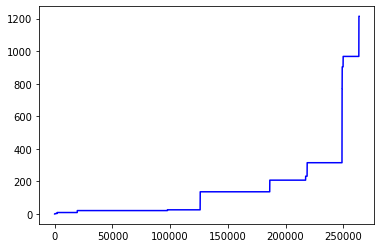

In [90]:
# plt.plot(df.index, df.v_acc)
lim = -1
# plt.plot( df.agg_vacc[:lim], c='r', )
plt.plot( res, c='b')
# plt.xlim(right=lim)
plt.show()

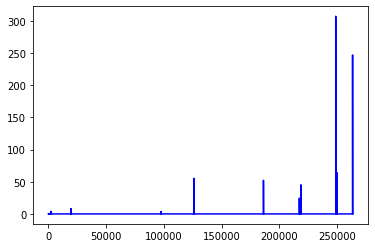

In [89]:
# plt.plot(df.index, df.v_acc)
lim = -1
# plt.plot( df.agg_vacc[:lim], c='r', )
plt.plot( np.diff(res, n=1), c='b')
# plt.xlim(right=lim)
plt.show()

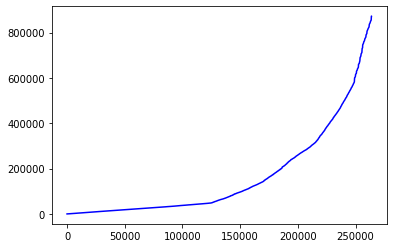

In [85]:
plt.plot( df.agg_vacc, c='b')
# plt.xlim(right=lim)
plt.show()

-1.7850220000000263

0.45287000000826083

In [12]:
df.agg_vacc.iloc[125000]

48444.661991998764

In [17]:
# OK
# GD - good
# BD - bad
# RB - really bad

def add_class(x):
    if x < 48000:
        return 'OK'
    else:
        return 'BAD'

In [18]:
df['y'] = df.agg_vacc.apply(lambda x: add_class(x))

In [20]:
df.head()

,h_acc,v_acc,agg_vacc,y
0,0.546121,0.042849,0.042849,OK
1,0.065025,0.042025,0.084874,OK
2,0.169744,0.003481,0.088355,OK
3,0.002025,0.195364,0.283719,OK
4,0.030625,0.129600,0.413319,OK


In [48]:
def corr(x, y):
    
    xn = (x - np.minimum(min(x), min(y))) / (np.maximum(max(x), max(y)) - np.minimum(min(x), min(y)))
    yn = (y - np.minimum(min(x), min(y))) / (np.maximum(max(x), max(y)) - np.minimum(min(x), min(y)))    
    
#     xn = x
#     yn = y
    
    num = np.sum(xn * yn)
    
    den = np.sqrt(np.sum(xn ** 2) * np.sum(yn ** 2))
    return num / den

In [49]:
corr(df.v_acc[:2560].values, df.v_acc[2560:5120].values)

0.3037819951914182

In [50]:
np.correlate((df.v_acc[:2560].values, df.v_acc[2560:5120].values))

TypeError: _correlate_dispatcher() missing 1 required positional argument: 'v'

In [35]:
np.sqrt(max(df.v_acc))

47.849

## Processo:
1. Estimar a curva cumsum
2. Atribuir uma aceleração máxima
3. Estimar o tempo de vida ou classificar como 'problemática'

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, )

In [22]:
df['agg_hacc'] = df.h_acc.cumsum()

In [23]:
X = df[['agg_hacc', 'agg_vacc']]
y = df['y']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.25, random_state=42)

In [25]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0